In [23]:
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [24]:
data = {
    'a': np.random.randn(10000),
    'b': np.random.randn(10000)
}
data['a1'] = [i * random.randint(100, 130) for i in data['a']]
data['a2'] = [i * random.random() * 0.1 for i in data['a']]
data['b1'] = [i * random.randint(10, 13) for i in data['b']]
data['b2'] = [i * random.random() * 0.05 for i in data['b']]
df = pd.DataFrame(data)
df['ab'] = df['a'] * df['b']
df['a + b'] = df['a'] + df['b']
df.head()

,a,b,a1,a2,b1,b2,ab,a + b
0,-0.404834,0.149391,-51.009078,-0.022546,1.792691,0.000980,-0.060479,-0.255443
1,0.285834,0.049360,36.015091,0.008756,0.542965,0.001986,0.014109,0.335194
2,1.419769,0.878986,183.150238,0.088590,8.789859,0.012888,1.247957,2.298755
3,-0.740717,2.477447,-91.108197,-0.028744,32.206815,0.120858,-1.835087,1.736730
4,1.116693,-1.663913,115.019415,0.108298,-21.630867,-0.074789,-1.858080,-0.547219


In [25]:
X_train = df[:5000]
X_test = df[5000:]

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(X_train)

PCA(n_components=2)

In [28]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.98983008 0.01009666]
[8121.9414292   820.29187027]


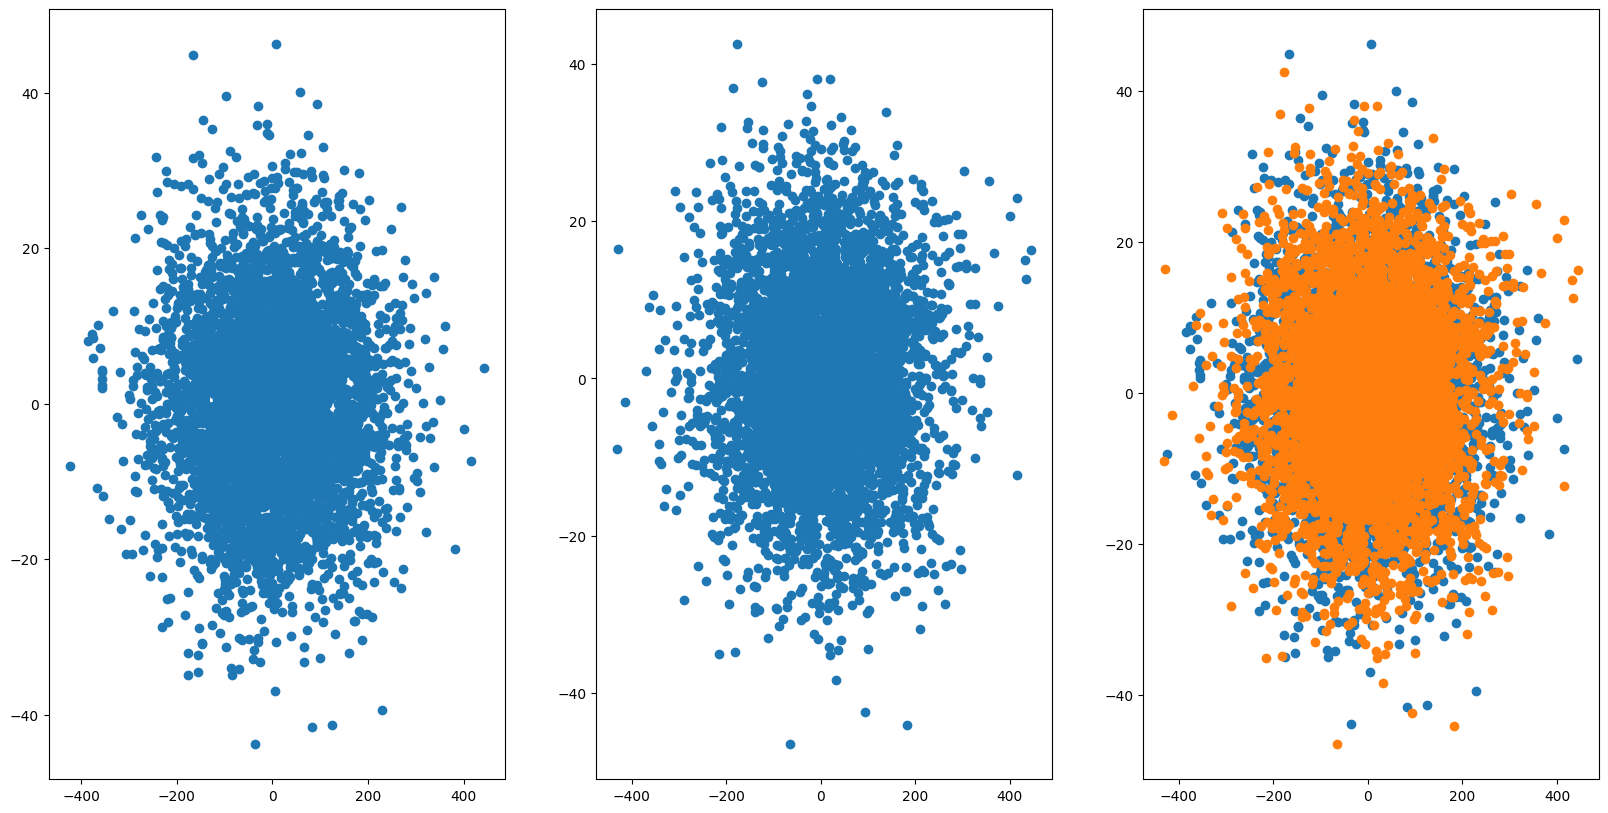

In [29]:
transformed_train = pca.transform(X_train)
transformed_test = pca.transform(X_test)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(transformed_train[:, 0], transformed_train[:, 1])
plt.subplot(1, 3, 2)
plt.scatter(transformed_test[:, 0], transformed_test[:, 1])
plt.subplot(1, 3, 3)
plt.scatter(transformed_train[:, 0], transformed_train[:, 1])
plt.scatter(transformed_test[:, 0], transformed_test[:, 1])

In [30]:
import numpy as np
from sklearn.cluster import  KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import  PCA
import matplotlib.pyplot as plt
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [31]:
print(f'digits: {n_digits}; n_sample: {n_samples}; features: {n_features}')

digits: 10; n_sample: 1797; features: 64


In [32]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=5)
kmeans.fit(reduced_data)

KMeans(n_clusters=10, n_init=5)

In [33]:
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [34]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

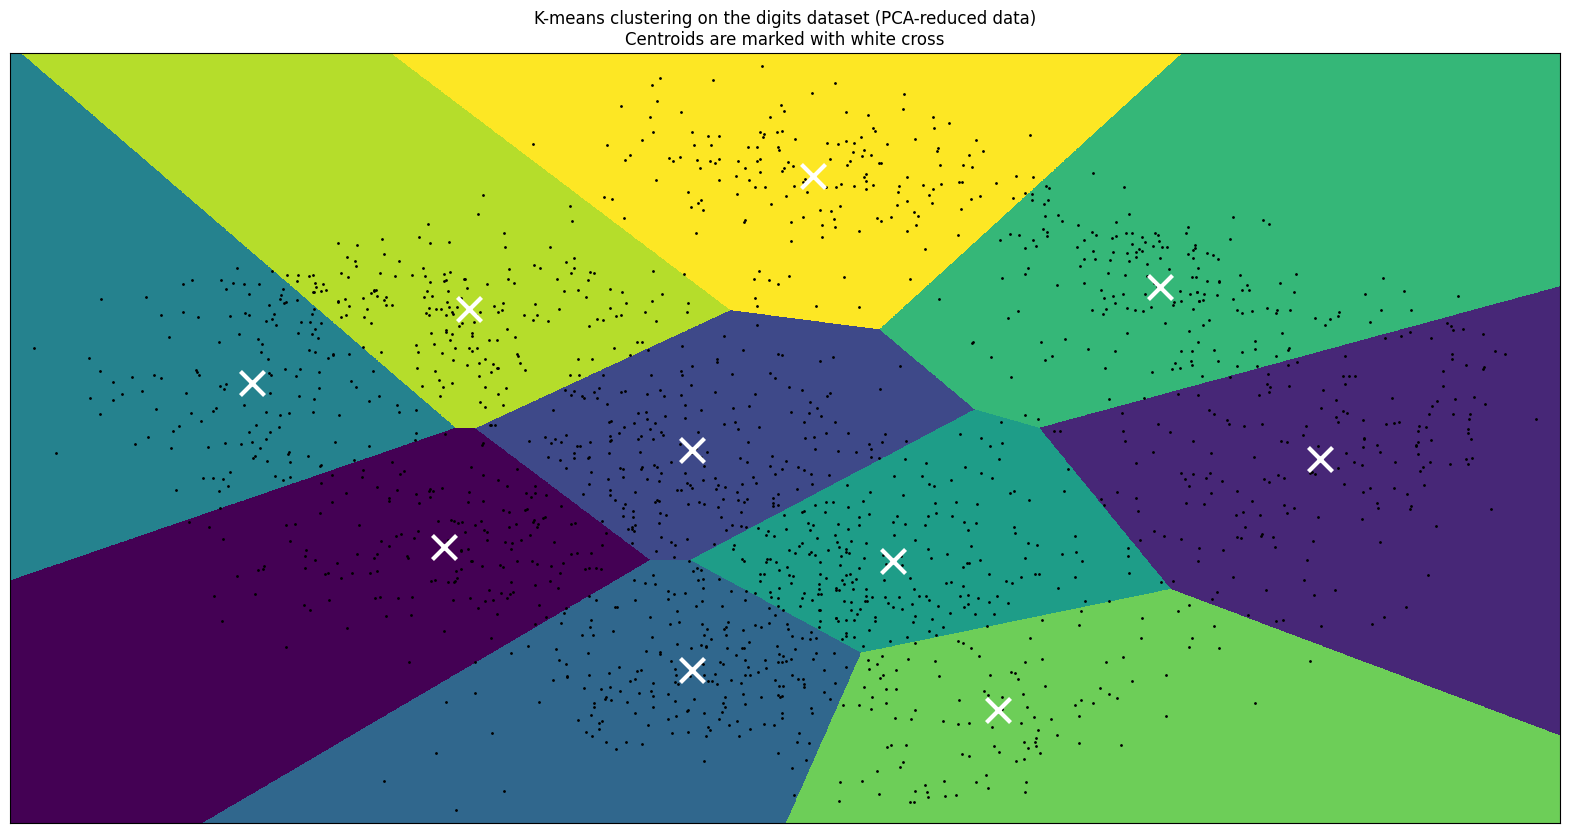

In [35]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1],'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=300,
    linewidths=3,
    color="w",
    zorder=10
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()